In [1]:
import tensorflow as tf
import numpy as np

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [2]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

In [3]:
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 5s 4ms/step - loss: 0.0872
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0200
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0129
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0110
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0099
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0091
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0086
Epoch 8/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0081
Epoch 9/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0077
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0075
Epoch 11/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 12/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0071
Epoch 13/20
235/235 [====

In [4]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 64)
[-0.99999964 -0.9995674   4.90153    21.416319    9.995706   -0.99999976
 -0.99999803  2.2614264   0.52738464 26.481104   11.071676   -0.9999989
 -0.99998903 -0.9999998  18.132507   -0.9990688  -0.9999997   7.2374806
 20.828005   -0.99999964 18.954584   -0.99999905  1.1849449  10.954719
 -0.99999964 -0.9999994   0.7849711  10.365602    3.7022038  10.840782
 19.666162   -0.9999983   8.01006     5.045291   -0.99999994 -0.17369866
 -0.9999998  21.96569    -0.9995111  19.172098   -0.9999995   7.3776712
  4.106485   17.201797   20.036304   -0.99999946 -0.9999999  -0.99999964
 28.174105    6.894591   -0.9999994   4.2079625   6.8670588   6.606727
 13.743518   -0.9999997  -0.9999998  19.54154    24.031021   -0.9999939
  9.310384   22.63206    17.706402   23.515503  ]


In [5]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

CPU times: user 16 s, sys: 3.3 s, total: 19.3 s
Wall time: 16.3 s


In [6]:
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[0])

[4 7 8 ... 4 1 4]
(10, 64)
[-0.99999875 -0.9980141  19.091986   18.723988    4.620455   -0.9999994
 -0.999959    9.916723    7.7245984  22.198427   21.25739    -0.9999924
 -0.9999649  -0.9999992  10.013318   -0.9928729  -0.99999946 22.663746
 19.299797   -0.9999996  15.615692   -0.9999988   7.943375   19.849392
 -0.9999994  -0.99998647  1.8241684  14.409723   17.223587   21.932455
 20.060701   -0.999986   13.923433    5.153907   -0.9999997   2.7581596
 -0.9999982  14.998443   -0.9995875  11.641766   -0.9999997  13.275121
 12.16223    12.884172   15.054261   -0.9999982  -0.9999977  -0.9999997
 20.53518     6.226487   -0.9999984  14.811552    5.2817273   5.946889
 28.59269    -0.99999946 -0.9999996  15.588608   16.333118   -0.9999754
 18.120413   11.271595   24.29612    18.663063  ]


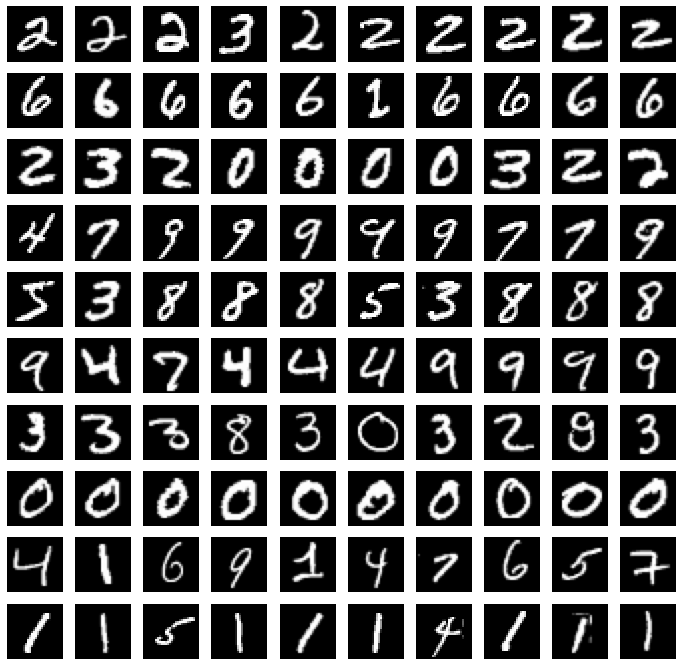

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))

for i in range(10):
    images = train_X[kmeans.labels_==i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28,28), cmap='gray')
        plt.axis('off')
plt.show()

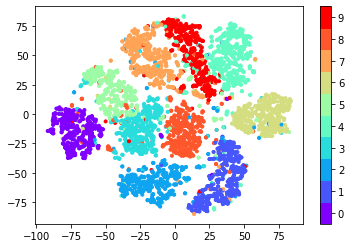

CPU times: user 1min 1s, sys: 26 ms, total: 1min 1s
Wall time: 33 s


In [8]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1) / n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))
plt.show()

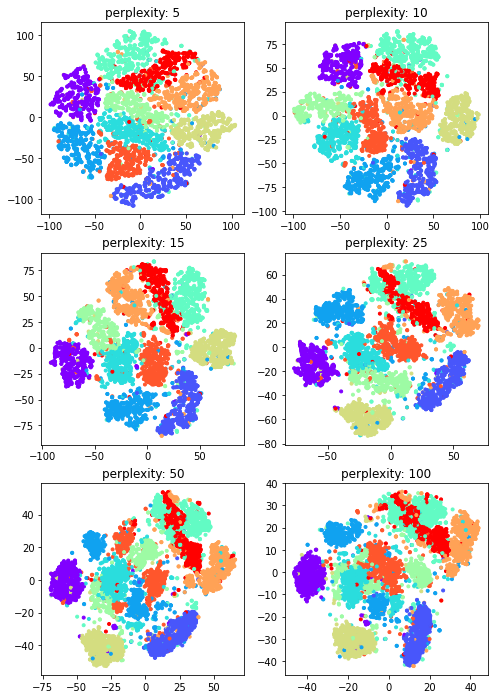

CPU times: user 7min 7s, sys: 907 ms, total: 7min 8s
Wall time: 3min 45s


In [10]:
%%time
from sklearn.manifold import TSNE

perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8,12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])

    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))
plt.show()

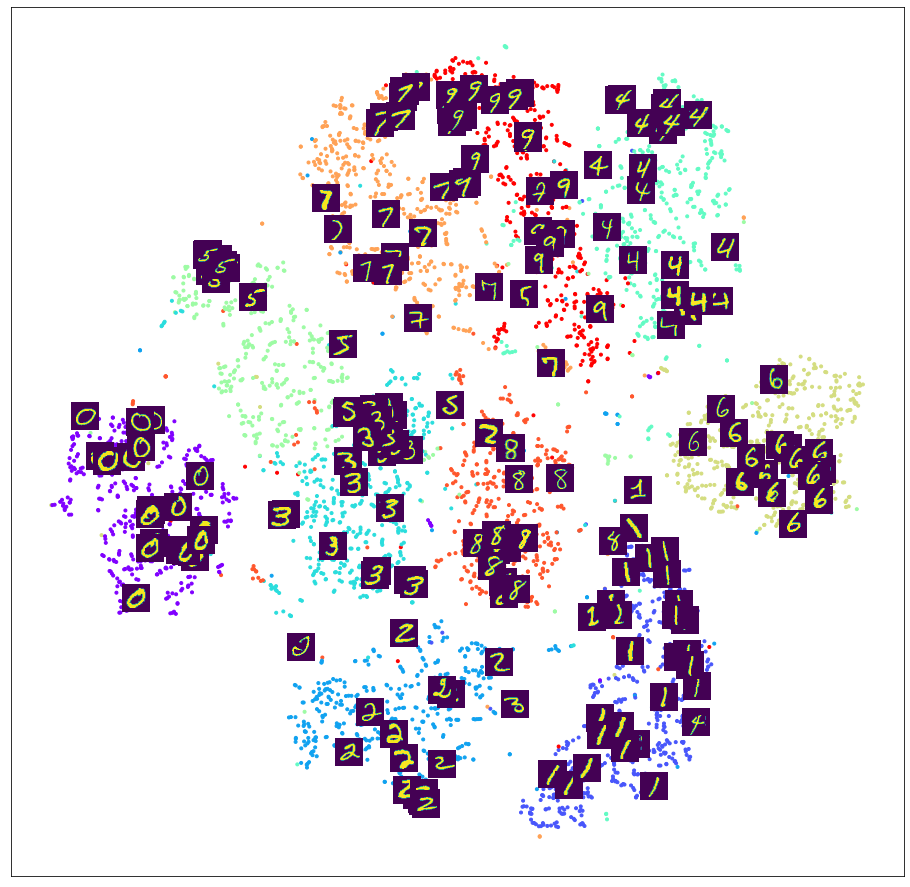

In [11]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
  imagebox = OffsetImage(train_X[i].reshape(28,28))
  ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
  ax.add_artist(ab)
ax.set_xticks([])
ax.set_yticks([])
plt.show()


In [12]:
tf.keras.utils.get_file('/content/bsd_images.zip', 'http://bit.ly/35pHZlC', extract=True)

!unzip /content/bsd_images.zip

37527552/37520292 [==============================] - 1s 0us/step
Archive:  /content/bsd_images.zip
   creating: images/
   creating: images/test/
  inflating: images/test/100007.jpg  
  inflating: images/test/100039.jpg  
  inflating: images/test/100099.jpg  
  inflating: images/test/10081.jpg   
  inflating: images/test/101027.jpg  
  inflating: images/test/101084.jpg  
  inflating: images/test/102062.jpg  
  inflating: images/test/103006.jpg  
  inflating: images/test/103029.jpg  
  inflating: images/test/103078.jpg  
  inflating: images/test/104010.jpg  
  inflating: images/test/104055.jpg  
  inflating: images/test/105027.jpg  
  inflating: images/test/106005.jpg  
  inflating: images/test/106047.jpg  
  inflating: images/test/107014.jpg  
  inflating: images/test/107045.jpg  
  inflating: images/test/107072.jpg  
  inflating: images/test/108004.jpg  
  inflating: images/test/108036.jpg  
  inflating: images/test/108069.jpg  
  inflating: images/test/109055.jpg  
  inflating: image

In [14]:
import pathlib

image_root = pathlib.Path('/content/images')
all_image_paths = list(image_root.glob('*/*'))
print(all_image_paths[:10])

[PosixPath('/content/images/test/176051.jpg'), PosixPath('/content/images/test/145059.jpg'), PosixPath('/content/images/test/189013.jpg'), PosixPath('/content/images/test/14092.jpg'), PosixPath('/content/images/test/179084.jpg'), PosixPath('/content/images/test/120093.jpg'), PosixPath('/content/images/test/134067.jpg'), PosixPath('/content/images/test/209021.jpg'), PosixPath('/content/images/test/206062.jpg'), PosixPath('/content/images/test/346016.jpg')]


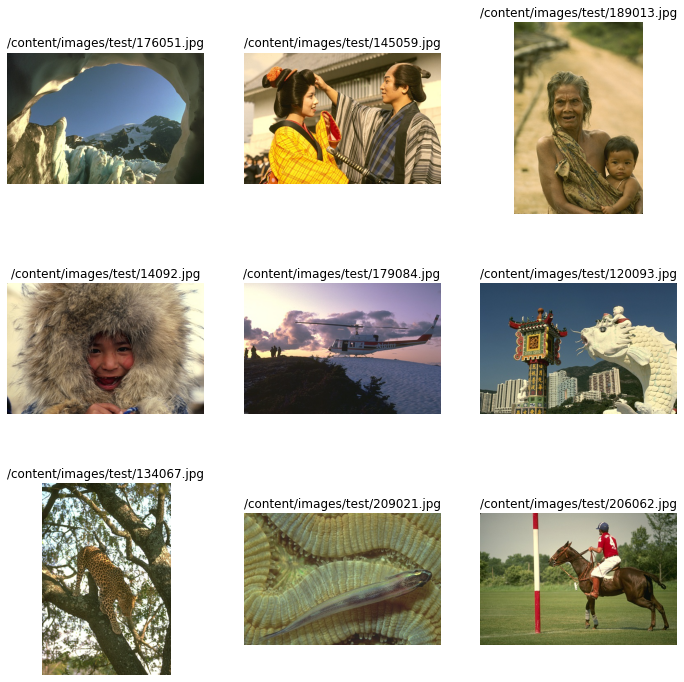

In [15]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
for c in range(9):
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread(all_image_paths[c]))
  plt.title(all_image_paths[c])
  plt.axis('off')
plt.show()

In [16]:
train_path, valid_path, test_path = [], [], []

for image_path in all_image_paths:
  if str(image_path).split('.')[-1] != 'jpg':
    continue

  if str(image_path).split('/')[-2] == 'train':
    train_path.append(str(image_path))
  elif str(image_path).split('/')[-2] == 'val':
    valid_path.append(str(image_path))
  else:
    test_path.append(str(image_path))

In [17]:
def get_hr_and_lr(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  hr = tf.image.random_crop(img, [50,50,3])
  lr = tf.image.resize(hr, [25,25])
  lr = tf.image.resize(lr, [50,50])
  return lr, hr

In [18]:
train_dataset = tf.data.Dataset.list_files(train_path)
train_dataset = train_dataset.map(get_hr_and_lr)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

valid_dataset = tf.data.Dataset.list_files(valid_path)
valid_dataset = valid_dataset.map(get_hr_and_lr)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(1)

In [19]:
def REDNet(num_layers):
  conv_layers = []
  deconv_layers = []
  residual_layers = []

  inputs = tf.keras.layers.Input(shape=(None,None,3))
  conv_layers.append(tf.keras.layers.Conv2D(3, kernel_size=3, padding='same', activation='relu'))

  for i in range(num_layers):
    conv_layers.append(tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
    deconv_layers.append(tf.keras.layers.Conv2DTranspose(64, kernel_size=3, padding='same', activation='relu'))
  
  deconv_layers.append(tf.keras.layers.Conv2DTranspose(3, kernel_size=3, padding='same'))

  x = conv_layers[0](inputs)

  for i in range(num_layers-1):
    x = conv_layers[i+1](x)
    if i % 2 == 0:
      residual_layers.append(x)
  
  for i in range(num_layers-1):
    if i % 2 == 1:
      x = tf.keras.layers.Add()([x, residual_layers.pop()])
      x = tf.keras.layers.Activation('relu')(x)
    x = deconv_layers[i](x)
  
  x = deconv_layers[-1](x)

  model = tf.keras.Model(inputs=inputs, outputs=x)
  return model

In [20]:
def psnr_metrics(y_true, y_pred):
  return tf.image.psnr(y_true, y_pred, max_val=1.0)

In [21]:
model = REDNet(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss='mse', metrics=[psnr_metrics])

In [22]:
history = model.fit_generator(train_dataset, epochs=1000, steps_per_epoch=len(train_path)//16, validation_data=valid_dataset,
                              validation_steps=len(valid_path), verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/1000
12/12 - 3s - loss: 0.1949 - psnr_metrics: 8.8534 - val_loss: 0.0943 - val_psnr_metrics: 11.7238
Epoch 2/1000
12/12 - 1s - loss: 0.0519 - psnr_metrics: 14.2559 - val_loss: 0.0327 - val_psnr_metrics: 15.8724
Epoch 3/1000
12/12 - 1s - loss: 0.0339 - psnr_metrics: 15.9556 - val_loss: 0.0250 - val_psnr_metrics: 17.0271
Epoch 4/1000
12/12 - 1s - loss: 0.0279 - psnr_metrics: 16.7539 - val_loss: 0.0214 - val_psnr_metrics: 17.4134
Epoch 5/1000
12/12 - 1s - loss: 0.0238 - psnr_metrics: 17.2715 - val_loss: 0.0192 - val_psnr_metrics: 18.0651
Epoch 6/1000
12/12 - 1s - loss: 0.0229 - psnr_metrics: 17.4975 - val_loss: 0.0175 - val_psnr_metrics: 18.5563
Epoch 7/1000
12/12 - 1s - loss: 0.0172 - psnr_metrics: 18.7218 - val_loss: 0.0151 - val_psnr_metrics: 19.4126
Epoch 8/1000
12/12 - 1s - loss: 0.0151 - psnr_metrics: 19.4863 - val_loss: 0.0151 - val_psnr_metrics: 19.3185
Epoch 9/1000
12/12 - 1s - loss: 0.0148 - psnr_metrics: 19.5639 - val_loss: 0.0125 - val_psnr_metrics: 20.3620
Epoch 10/10

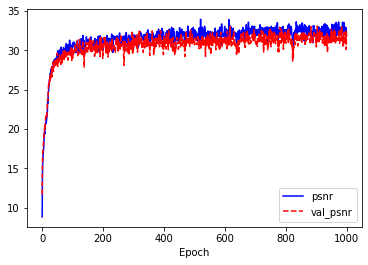

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['psnr_metrics'], 'b-', label='psnr')
plt.plot(history.history['val_psnr_metrics'], 'r--', label='val_psnr')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [25]:
img = tf.io.read_file(test_path[0])
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//2, hr.shape[1]//2])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))

tf.Tensor(31.282276, shape=(), dtype=float32)
tf.Tensor(29.740524, shape=(), dtype=float32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'sr')

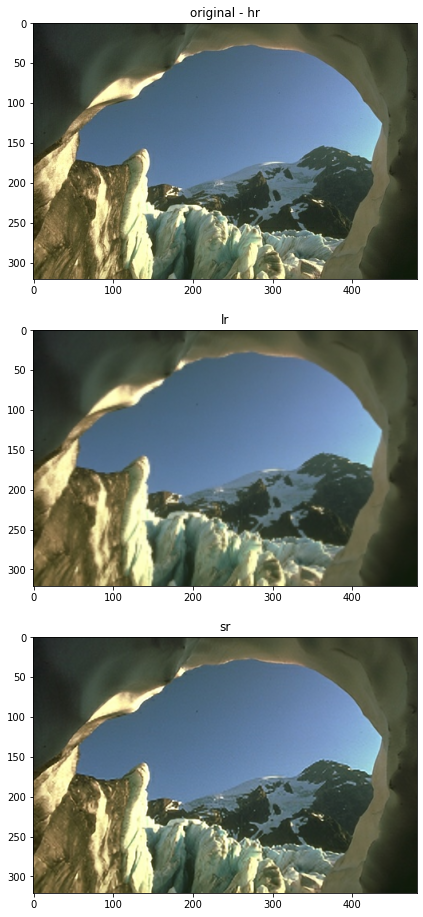

In [26]:
plt.figure(figsize=(8,16))

plt.subplot(3,1,1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(3,1,2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(3,1,3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

In [27]:
image_path = tf.keras.utils.get_file('butterfile.png', 'http://bit.ly/2oAOxgH')
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//2, hr.shape[1]//2])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))

131072/127529 [==============================] - 0s 0us/step
tf.Tensor(30.894337, shape=(), dtype=float32)
tf.Tensor(24.783773, shape=(), dtype=float32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'sr')

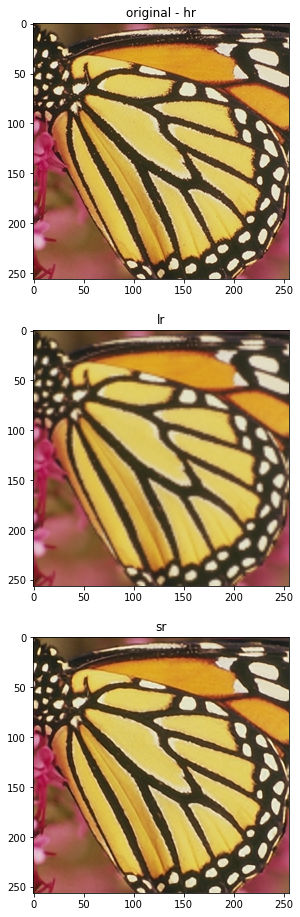

In [28]:
plt.figure(figsize=(8,16))

plt.subplot(3,1,1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(3,1,2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(3,1,3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')

In [29]:
import random
def get_hr_and_lr_flip_s4(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  hr = tf.image.convert_image_dtype(img, tf.float32)

  hr = tf.image.random_crop(img, [50,50,3])
  lr = tf.image.resize(hr, [12,12])
  lr = tf.image.resize(lr, [50,50])

  if random.random() < 0.25:
    hr = tf.image.flip_left_right(hr)
    lr = tf.image.flip_left_right(lr)
  if random.random() < 0.25:
    hr = tf.image.flip_left_right(hr)
    lr = tf.image.flip_left_right(lr)
  return lr, hr

In [31]:
train_dataset = tf.data.Dataset.list_files(train_path)
train_dataset = train_dataset.map(get_hr_and_lr_flip_s4)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(16)

valid_dataset = tf.data.Dataset.list_files(valid_path)
valid_dataset = valid_dataset.map(get_hr_and_lr_flip_s4)
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(1)

model = REDNet(15)
model.compile(optimizer=tf.optimizers.Adam(0.0001), loss='mse', metrics=[psnr_metrics])

history = model.fit_generator(train_dataset, epochs=4000, steps_per_epoch=len(train_path)//16, validation_data=valid_dataset, validation_steps=len(valid_path), verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1501/4000
12/12 - 1s - loss: 285.1819 - psnr_metrics: -2.0952e+01 - val_loss: 360.3743 - val_psnr_metrics: -2.1682e+01
Epoch 1502/4000
12/12 - 1s - loss: 322.7861 - psnr_metrics: -2.1251e+01 - val_loss: 340.1704 - val_psnr_metrics: -2.2415e+01
Epoch 1503/4000
12/12 - 1s - loss: 283.0472 - psnr_metrics: -2.0204e+01 - val_loss: 363.2785 - val_psnr_metrics: -2.2052e+01
Epoch 1504/4000
12/12 - 1s - loss: 314.8149 - psnr_metrics: -2.0763e+01 - val_loss: 327.8118 - val_psnr_metrics: -2.1838e+01
Epoch 1505/4000
12/12 - 1s - loss: 301.1566 - psnr_metrics: -2.1107e+01 - val_loss: 320.3852 - val_psnr_metrics: -2.1497e+01
Epoch 1506/4000
12/12 - 1s - loss: 341.8573 - psnr_metrics: -2.1796e+01 - val_loss: 338.4499 - val_psnr_metrics: -2.2016e+01
Epoch 1507/4000
12/12 - 1s - loss: 319.6294 - psnr_metrics: -2.1156e+01 - val_loss: 356.8554 - val_psnr_metrics: -2.0924e+01
Epoch 1508/4000
12/12 - 1s - loss: 343.9230 - psnr_metrics: -2.1420e+01 - val_loss: 328.5

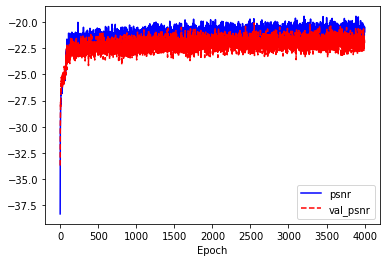

In [32]:
plt.plot(history.history['psnr_metrics'], 'b-', label='psnr')
plt.plot(history.history['val_psnr_metrics'], 'r--', label='val_psnr')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(2.665059, shape=(), dtype=float32)
tf.Tensor(20.217585, shape=(), dtype=float32)


Text(0.5, 1.0, 'sr')

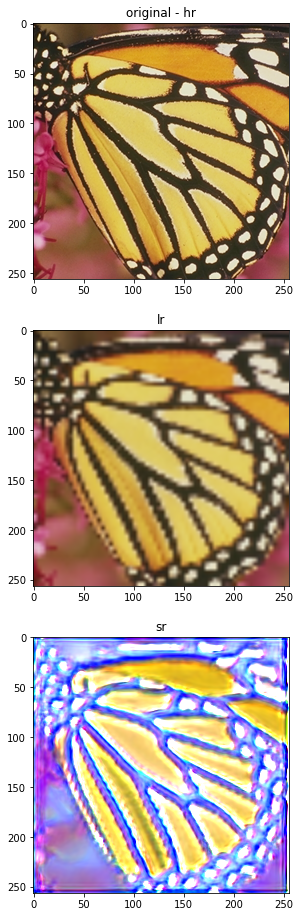

In [33]:
image_path = tf.keras.utils.get_file('butterfile.png', 'http://bit.ly/2oAOxgH')
img = tf.io.read_file(image_path)
img = tf.image.decode_jpeg(img, channels=3)
hr = tf.image.convert_image_dtype(img, tf.float32)

lr = tf.image.resize(hr, [hr.shape[0]//4, hr.shape[1]//4])
lr = tf.image.resize(lr, [hr.shape[0], hr.shape[1]])
predict_hr = model.predict(np.expand_dims(lr, axis=0))

print(tf.image.psnr(np.squeeze(predict_hr, axis=0), hr, max_val=1.0))
print(tf.image.psnr(lr, hr, max_val=1.0))

plt.figure(figsize=(8,16))

plt.subplot(3,1,1)
plt.imshow(hr)
plt.title('original - hr')

plt.subplot(3,1,2)
plt.imshow(lr)
plt.title('lr')

plt.subplot(3,1,3)
plt.imshow(np.squeeze(predict_hr, axis=0))
plt.title('sr')